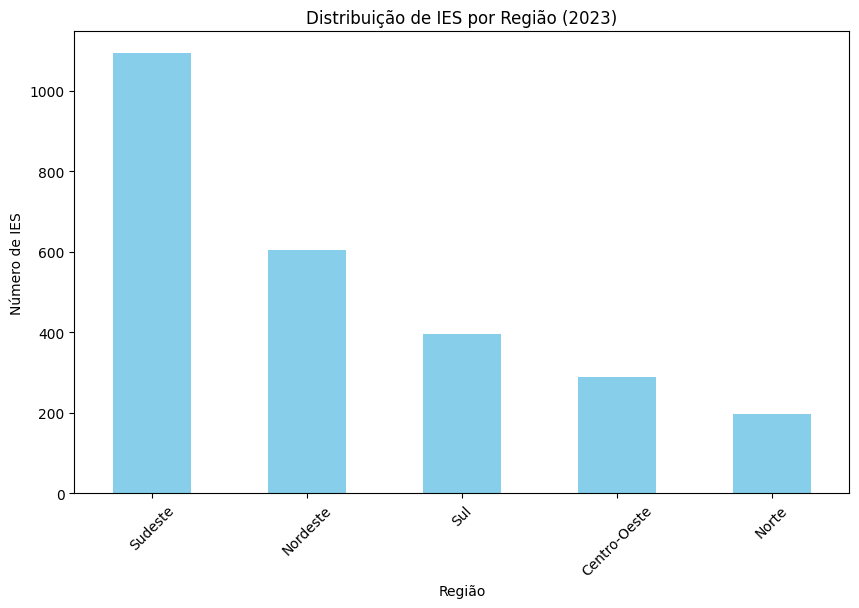

Total de docentes com doutorado: 192372


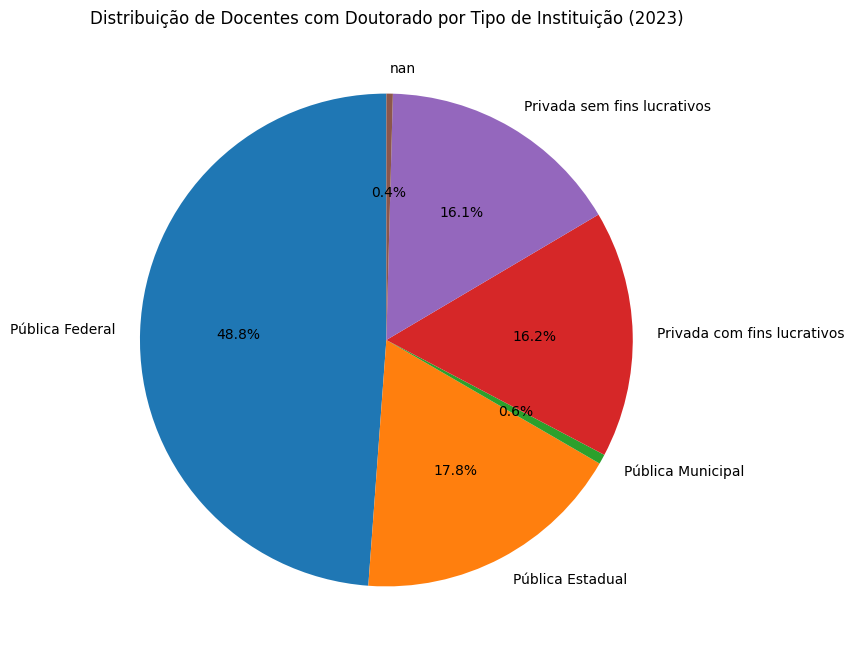

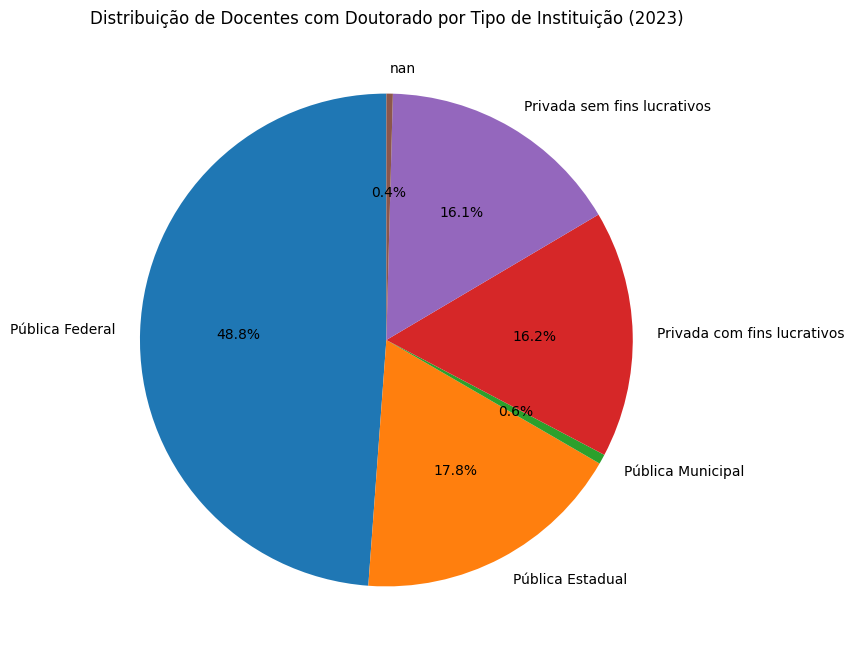

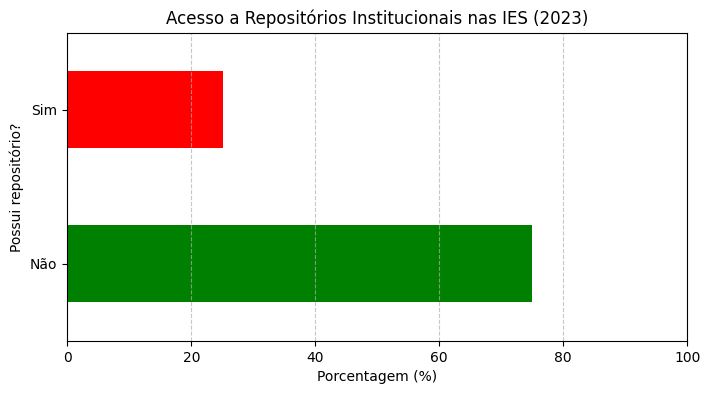

In [2]:

import pandas as pd
import matplotlib.pyplot as plt

# 1. Carregar os dados com codificação correta
try:
    df = pd.read_csv('MICRODADOS_ED_SUP_IES_2023.CSV', sep=';', encoding='ISO-8859-1')
except:
    # Fallback para latin1 se ISO-8859-1 falhar
    df = pd.read_csv('MICRODADOS_ED_SUP_IES_2023.CSV', sep=';', encoding='latin1')

# 2. Gráfico de distribuição por região
plt.figure(figsize=(10, 6))
df['NO_REGIAO_IES'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribuição de IES por Região (2023)')
plt.xlabel('Região')
plt.ylabel('Número de IES')
plt.xticks(rotation=45)
plt.show()

# 3. Gráfico de docentes com doutorado (ajuste os nomes das colunas conforme seu CSV)
if 'QT_DOC_EX_DOUT' in df.columns:
    docentes_doutores = df['QT_DOC_EX_DOUT'].sum()
    print(f"Total de docentes com doutorado: {docentes_doutores}")
else:
    print("Coluna 'QT_DOC_EX_DOUT' não encontrada. Verifique os nomes das colunas.")


# Agrupar por categoria administrativa (pública/privada) e somar doutores
docentes_doutores = df.groupby('TP_CATEGORIA_ADMINISTRATIVA')['QT_DOC_EX_DOUT'].sum()

# Mapear códigos para labels (1=Pública, 2=Privada, etc.)
labels = {
    1: 'Pública Federal',
    2: 'Pública Estadual',
    3: 'Pública Municipal',
    4: 'Privada com fins lucrativos',
    5: 'Privada sem fins lucrativos'
}
docentes_doutores.index = docentes_doutores.index.map(labels)

# Gráfico de pizza
plt.figure(figsize=(8, 8))
docentes_doutores.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Docentes com Doutorado por Tipo de Instituição (2023)')
plt.ylabel('')
plt.show()


# Agrupar por categoria administrativa (pública/privada) e somar doutores
docentes_doutores = df.groupby('TP_CATEGORIA_ADMINISTRATIVA')['QT_DOC_EX_DOUT'].sum()

# Mapear códigos para labels (1=Pública, 2=Privada, etc.)
labels = {
    1: 'Pública Federal',
    2: 'Pública Estadual',
    3: 'Pública Municipal',
    4: 'Privada com fins lucrativos',
    5: 'Privada sem fins lucrativos'
}
docentes_doutores.index = docentes_doutores.index.map(labels)

# Gráfico de pizza
plt.figure(figsize=(8, 8))
docentes_doutores.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Docentes com Doutorado por Tipo de Instituição (2023)')
plt.ylabel('')
plt.show()


# Calcular porcentagem de IES com repositório institucional (IN_REPOSITORIO_INSTITUCIONAL = 1)
repo_acesso = df['IN_REPOSITORIO_INSTITUCIONAL'].value_counts(normalize=True) * 100

# Gráfico de barras horizontais
plt.figure(figsize=(8, 4))
repo_acesso.plot(kind='barh', color=['green', 'red'])
plt.title('Acesso a Repositórios Institucionais nas IES (2023)')
plt.xlabel('Porcentagem (%)')
plt.ylabel('Possui repositório?')
plt.xticks([0, 20, 40, 60, 80, 100])
plt.gca().set_yticklabels(['Não', 'Sim'])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
